<a href="https://colab.research.google.com/github/ShriAmogh/ArabicHandwrittenRecongnitionNN/blob/main/Arabic_handwritten_recognition_ann.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing necessory libraries.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf

Reading data from CSV

In [ ]:
train_data = pd.read_csv("/content/csvTrainImages 60k x 784.csv")
train_label = pd.read_csv("/content/csvTestLabel 10k x 1.csv")
test_data = pd.read_csv("/content/csvTestImages 10k x 784.csv")
test_label = pd.read_csv("/content/csvTestLabel 10k x 1.csv")


type(df)

pandas.core.frame.DataFrame

Image data and label data are already separated.

In [ ]:
arr = np.array(train_data)
arr1 = np.array(train_label)

In [ ]:
train_data.shape, train_label.shape

((59999, 784), (9999, 1))

In [ ]:
arr[0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [ ]:
arr1[0]

array([1])

To check the number of classes in the given dataset

In [ ]:
num_classes = train_label.nunique()

print(f"The number of classes are from :{num_classes}")


The number of classes are from :0    10
dtype: int64


ANN model *(Sequential API)*

--Below model with 2 hidden layers and 200 & 100 neurons respectively.

In [ ]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = [784]),
    tf.keras.layers.Dense(200, activation = "relu"),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "softmax")

])

In [ ]:
model_1.compile(loss = tf.keras.losses.sparse_categorical_crossentropy,
                optimizer = tf.keras.optimizers.Adam(),
                metrics = (['accuracy']))

In [ ]:
history_1 = model_1.fit(train_data[0:9999], train_label, epochs = 10, validation_data = (test_data, test_label))

Epoch 1/10
313/313 [==============================] - 48s 8ms/step - loss: 3.8692 - accuracy: 0.8903 - val_loss: 1.5641 - val_accuracy: 0.9221
Epoch 2/10
313/313 [==============================] - 2s 6ms/step - loss: 0.5213 - accuracy: 0.9648 - val_loss: 1.1627 - val_accuracy: 0.9332
Epoch 3/10
313/313 [==============================] - 3s 9ms/step - loss: 0.3665 - accuracy: 0.9729 - val_loss: 1.0887 - val_accuracy: 0.9383
Epoch 4/10
313/313 [==============================] - 2s 5ms/step - loss: 0.2471 - accuracy: 0.9797 - val_loss: 1.2034 - val_accuracy: 0.9298
Epoch 5/10
313/313 [==============================] - 2s 5ms/step - loss: 0.1974 - accuracy: 0.9820 - val_loss: 1.2727 - val_accuracy: 0.9424
Epoch 6/10
313/313 [==============================] - 2s 5ms/step - loss: 0.2568 - accuracy: 0.9813 - val_loss: 1.1004 - val_accuracy: 0.9470
Epoch 7/10
313/313 [==============================] - 2s 5ms/step - loss: 0.2712 - accuracy: 0.9806 - val_loss: 1.1982 - val_accuracy: 0.9385
Epoch

In [ ]:
model_1.evaluate(test_data, test_label)

313/313 [==============================] - 1s 2ms/step - loss: 0.8683 - accuracy: 0.9478


[0.8682627081871033, 0.9477947950363159]

Visually looking at the first image of the dataset

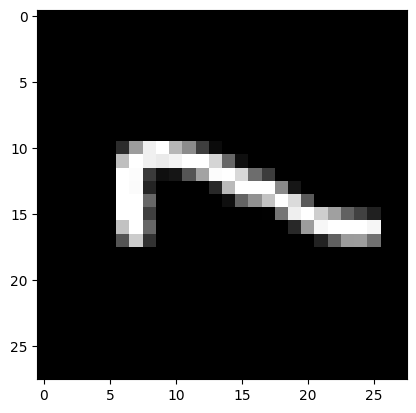

In [ ]:
img = arr[1]
img = img.reshape(28,28)
plt.imshow(img, cmap = 'gray')

In [ ]:
yPred = model_1.predict(test_data[0:3]).round(2)
print(yPred)
print(
    [
        j
        for i in range(len(yPred))
        for j in range(len(yPred[0]))
        if yPred[i, j] == max(yPred[i])
    ]
)

1/1 [==============================] - 0s 17ms/step
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
[1, 2, 3]
